# 加载模块
- 绘图:matplotlib 
- 数值计算:numpy
- 图像处理:skimage

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util

# 伪彩色图像生成

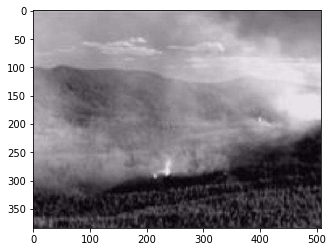

In [8]:
image=io.imread('timg.jpeg')
imagergb=image.copy()
imagergb[:,:,0]=np.interp(image[:,:,0],[0,50,100,150,200,255],[0,0,0,55,155,255])
imagergb[:,:,1]=np.interp(image[:,:,0],[0,50,100,150,200,255],[0,155,255,155,0,0])
imagergb[:,:,2]=np.interp(image[:,:,0],[0,50,100,150,200,255],[255,155,55,0,0,0])
plt.imshow(image)
#io.imsave('timgcolor.png',imagergb)

# 颜色映射表

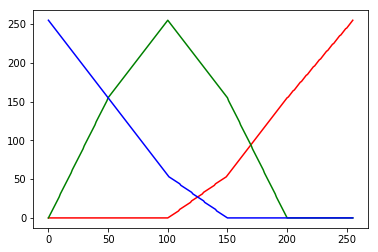

In [4]:
lutr=np.uint8(np.interp(range(256),[0,50,100,150,200,255],[0,0,0,55,155,255]))
lutg=np.uint8(np.interp(range(256),[0,50,100,150,200,255],[0,155,255,155,0,0]))
lutb=np.uint8(np.interp(range(256),[0,50,100,150,200,255],[255,155,55,0,0,0]))
plt.plot(range(256),lutr,'r',np.array(range(256)),lutg,'g',range(256),lutb,'b')

# 灰度图像变换

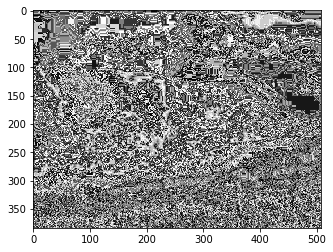

In [24]:
#shuffled gray scale but the rgb image is not affected because look up table is changed
lutgray=np.array(range(256))
lutshuffle=lutgray.copy()
np.random.shuffle(lutshuffle)

shuffled=np.uint8(np.interp(image[:,:,0],lutgray,lutshuffle))
#io.imsave('shuffled.png',shuffled)
plt.set_cmap('gray')
plt.imshow(shuffled)

# 映射表变换

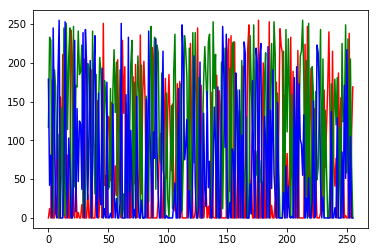

In [18]:
shuffledlutr=lutr.copy()
shuffledlutr[lutshuffle]=lutr
shuffledlutg=lutg.copy()
shuffledlutg[lutshuffle]=lutg
shuffledlutb=lutb.copy()
shuffledlutb[lutshuffle]=lutb
plt.plot(range(256),shuffledlutr,'r',np.array(range(256)),shuffledlutg,'g',range(256),shuffledlutb,'b')

# 灰度图像与映射表改变后的彩色图像

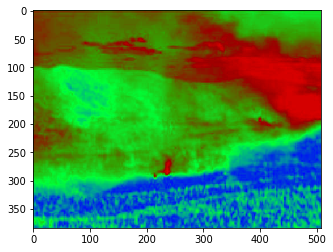

In [12]:
shuffledrgb=image.copy()
shuffledrgb[:,:,0]=np.interp(shuffled,lutgray,shuffledlutr)
shuffledrgb[:,:,1]=np.interp(shuffled,lutgray,shuffledlutg)
shuffledrgb[:,:,2]=np.interp(shuffled,lutgray,shuffledlutb)
plt.imshow(shuffledrgb)

# 彩色变换

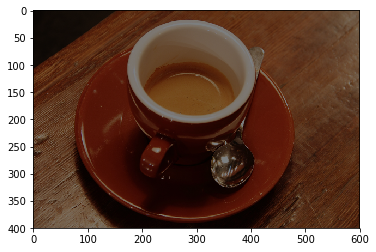

In [3]:
image=data.coffee()
brighter=np.uint8(image*0.5+255*0.5)
io.imshow(brighter)

In [ ]:
image=data.coffee()
darker=np.uint8(image*0.5)
io.imshow(darker)

# 补色

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


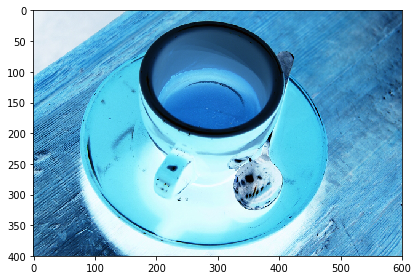

In [4]:
image=data.coffee()
invert=255-image
io.imshow(invert)
io.show()

# 彩色分层

In [9]:
image=io.imread('trafficlight.png')
segred=image.copy()
seggreen=image.copy()
segyellow=image.copy()
maskred=(image[:,:,0]>100) & (image[:,:,1]<50 ) & (image[:,:,2]<50)
maskgreen=(image[:,:,0]<100) & (image[:,:,1]>100 ) & (image[:,:,2]<100)
maskyellow=(image[:,:,0]>100) & (image[:,:,1]>100 ) & (image[:,:,2]<70)

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


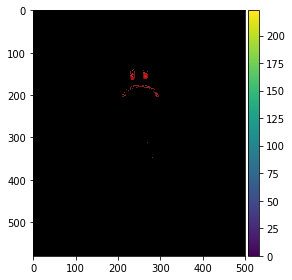

In [11]:
segred[:,:,0]*=maskred
segred[:,:,1]*=maskred
segred[:,:,2]*=maskred
io.imshow(segred)

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


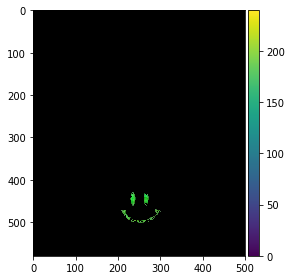

In [12]:

seggreen[:,:,0]*=maskgreen
seggreen[:,:,1]*=maskgreen
seggreen[:,:,2]*=maskgreen
io.imshow(seggreen)


/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


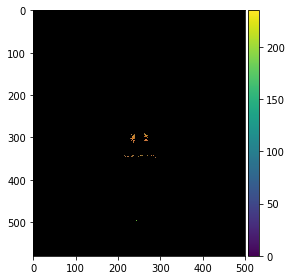

In [13]:

segyellow[:,:,0]*=maskyellow
segyellow[:,:,1]*=maskyellow
segyellow[:,:,2]*=maskyellow
io.imshow(segyellow)

# 色调和彩色校正

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


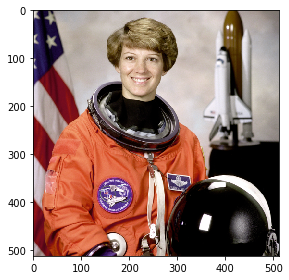

In [14]:
image=data.astronaut()
io.imshow(image)


/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


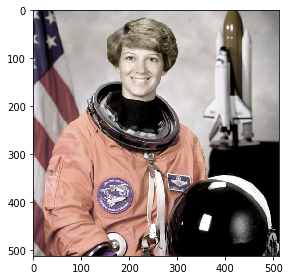

In [15]:

h1=color.rgb2hsv(image)
h2=h1.copy()
h1[:,:,1]=h1[:,:,1]*0.5
image1=color.hsv2rgb(h1)
io.imshow(image1)


/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


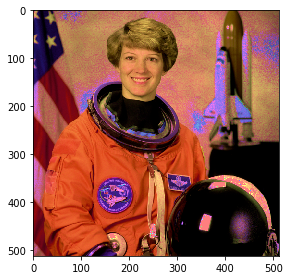

In [16]:

h2[:,:,1]=h2[:,:,1]*0.5+0.5
image2=color.hsv2rgb(h2)
io.imshow(image2)


/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


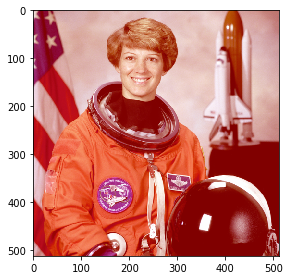

In [17]:

imagered=image.copy()
imagered[:,:,0]=image[:,:,0]*127.0/255+128
io.imshow(imagered)

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


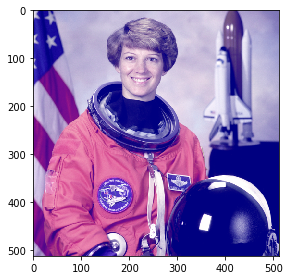

In [18]:

imageblue=image.copy()
imageblue[:,:,2]=image[:,:,2]*127.0/255+128
io.imshow(imageblue)



/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


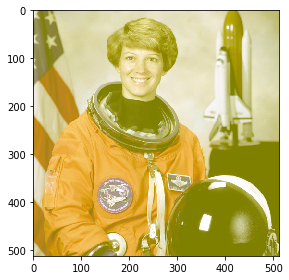

In [19]:
imageyellow=image.copy()
imageyellow[:,:,0]=image[:,:,0]*127.0/255+128
imageyellow[:,:,1]=image[:,:,1]*127.0/255+128
io.imshow(imageyellow)

# 直方图均衡

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/xing/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


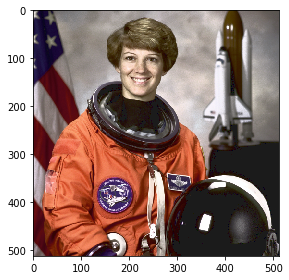

In [21]:
image=data.astronaut()
h=color.rgb2hsv(image)
h[:,:,2]=exposure.equalize_hist(h[:,:,2])
image_equal=color.hsv2rgb(h)
io.imshow(image_equal)
io.imsave('astronautequal.png',image_equal)

# 平滑与锐化

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


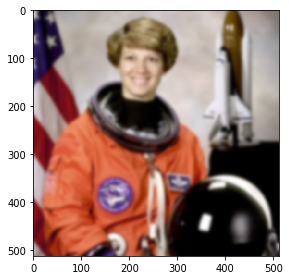

In [27]:
image=data.astronaut()
g3=filters.gaussian(image,3)
io.imshow(g3)
#g9=filters.gaussian(image,9)
#io.imshow(g9)
#g15=filters.gaussian(image,15)
#io.imshow(g15)
    

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


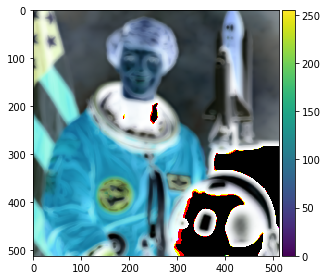

In [46]:
image=g3*255
sharprgb=image.copy()
for i in range(3):
    l=np.abs(filters.laplace(image[:,:,i]))
    sharprgb[:,:,i]=np.uint8(np.minimum(image[:,:,i]+l/l.max()*55,255))
io.imshow(sharprgb)

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


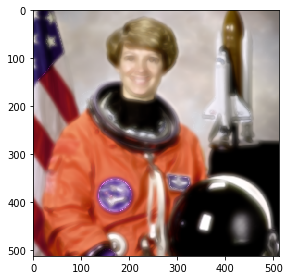

In [47]:
image=g3
sharphsv=color.rgb2hsv(image)
l=np.abs(filters.laplace(sharphsv[:,:,2]))
sharphsv[:,:,2]=np.minimum(l/l.max()*0.5+sharphsv[:,:,2],1)
io.imshow(color.hsv2rgb(sharphsv))

# 颜色分割

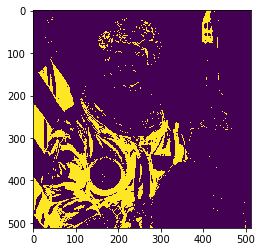

In [50]:
image=data.astronaut()
r=np.uint8((image[:,:,0]>100 ) & (image[:,:,1]<100) & (image[:,:,2]<100))
plt.imshow(r*255)
g=np.uint8((image[:,:,0]<100 ) & (image[:,:,1]>100) & (image[:,:,2]<100))
#plt.imshow(g*255)
b=np.uint8((image[:,:,0]<100 ) & (image[:,:,1]<100) & (image[:,:,2]>100))
#plt.imshow(b*255)


#  边缘

/home/xing/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


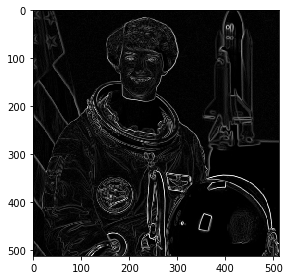

In [51]:
image=data.astronaut()
r=np.abs(filters.sobel(image[:,:,0]))
r=np.uint8(r/r.max()*255)
io.imshow(r)
g=np.abs(filters.sobel(image[:,:,1]))
g=np.uint8(g/g.max()*255)
io.imshow(g)
b=np.abs(filters.sobel(image[:,:,2]))
b=np.uint8(b/b.max()*255)
io.imshow(b)

In [71]:
image=data.astronaut()
noiseg=util.noise.random_noise(image,'gaussian')

#io.imshow(noiseg)

noiseghsv=color.rgb2hsv(noiseg)        
#io.imshow(noiseghsv[:,:,0])

#io.imshow(filters.gaussian(noiseg[:,:,0]))

noisei=util.noise.random_noise(image,'s&p')
#io.imshow(noisei)

noiseihsv=color.rgb2hsv(noisei)
#io.imshow(noiseihsv[:,:,2])

#io.imshow(filters.median(noisei[:,:,0]))